In [27]:
# this notebook is a tutorial for running a kinetic monte carlo simulation for a surface catalyzed reaction to obtain equilibrium behaviors

In [28]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

In [29]:
#have A + * <-> A* <-> B* <-> B + *

#the rules are:

# if L1 - *,
# transition to:
# L1 - A* 
# kA_a * N_A/(N_A + N_B) # A adsorption
# L1 - B*
# kB_a * N_B/(N_A + N_B) # B adsorption

kA_a0 = 10
kB_a0 = 1

# if L1 - A*,
# transition to:
# L1 - *,
# kA_d  # A desorption
# L1 - B* 
# k_AB # convert to B

kA_d = 1
k_AB = .1

# if L1 - B*,
# transition to:
# L1 - *,
# kB_d  # B desorption
# L1 - A* 
# k_BA # convert to A

kB_d = .1
k_BA = .01

In [30]:
# initialize:

N_A = 1000
N_B = 0

t = 0

trials = 100000

L = 0 #0 - empty, 1 - A*, 2 - B*

N_As = list([N_A])
N_Bs = list([N_B])
ts = list([t])

r_b = 0
#want to track the A/B ratio with time, I think

In [31]:
for i in range(trials):
    u1 = np.random.rand(1) #rand for the particular process selected
    u2 = np.random.rand(1) #rand for  the time step
    if L == 0: #vacant site
        #adsorption
        kA_a = kA_a0 * (N_A)/(N_A + N_B) #adsorption rate of A based on prevalent A mole fraction
        kB_a = kB_a0 * (N_B)/(N_A + N_B) #adsorption rate of B based on prevalent B mole fraction
        ks = np.array([kA_a,kB_a])
        k_tot = np.sum(ks) 
        k_stack = np.cumsum(ks)
        select = u1*k_tot
        #pick the first one that is larger than select
        indexes = np.arange(len(k_stack))
        ind_move = indexes[k_stack>select][0] 
        if ind_move == 0:
            L = 1
            N_A += -1
        elif ind_move == 1:
            L = 2
            N_B += -1
        
    elif L == 1: #A covered
        # A desorbs or reacts to form B
        ks = np.array([kA_d,k_AB ])
    
        k_tot = np.sum(ks) 

        p_esc = k_tot*np.exp(-k_tot*t) #propability of escape

        k_stack = np.cumsum(ks)
    
        select = u1*k_tot
        #pick the first one that is larger than select
        indexes = np.arange(len(k_stack))

        ind_move = indexes[k_stack>select][0]
        
        if ind_move == 0:
            L = 0
            N_A += 1
        elif ind_move == 1:
            L = 2
            
    elif L == 2: #B covered
        # B desorbs or reacts to form A
        ks = np.array([kB_d,k_BA ])
    
        k_tot = np.sum(ks) 

        p_esc = k_tot*np.exp(-k_tot*t) #propability of escape

        k_stack = np.cumsum(ks)
    
        select = u1*k_tot
        #pick the first one that is larger than select
        indexes = np.arange(len(k_stack))

        ind_move = indexes[k_stack>select][0]
        
        if ind_move == 0:
            L = 0
            N_B += 1
            k_b = +kB_d
        elif ind_move == 1:
            L = 1     
    
    t += - np.log(u2)/k_tot #t estable
    ts.append(t[0])
    
    N_As.append(N_A)
    N_Bs.append(N_B)


    
    

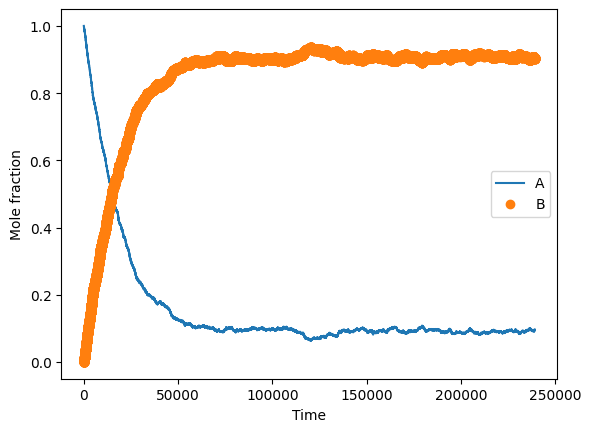

In [32]:
N_tot = N_A + N_B

plt.plot(ts,np.array(N_As)/N_tot,label = 'A')
plt.plot(ts,np.array(N_Bs)/N_tot,'o',label = 'B')
plt.xlabel('Time')
plt.ylabel('Mole fraction')
plt.legend()

In [33]:
#obtain equilibirum ratio from trajectory:
#first, find the index where time is >150,000
ts_np = np.array(ts)
t_eq = ts_np[(ts_np)>150000][0]
ind_eq = np.where(ts_np==t_eq)

#then find the the mean ratio of A and B at all times afterwards
np.mean(N_Bs[int(ind_eq[0]):])/np.mean(N_As[int(ind_eq[0]):])

9.88742595180897

In [34]:
#what is the equilibrium?
#[kA_a,kB_a,kA_a,k_AB,kB_a,k_BA]

K1 = kA_a0/kA_d
K2 = k_AB/k_BA
K3 = kB_d/kB_a0

K_AB_eq = K1*K2*K3
print(K_AB_eq)

10.0
